# Time Series Modeling with Keras

- ~~Official Tutorial:~~
    - https://www.tensorflow.org/tutorials/structured_data/time_series
    
- Using the TimeSeriesGenerator
    - https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/
    
- Using Tensorflow 2.0's time series methods
    - https://keras.io/api/preprocessing/timeseries/

In [1]:
## MUST DOWNLOAD DATA THE FIRST TIME YOU RUN THIS NOTEBOOK
DOWNLOAD_DATA=False

In [2]:
# !pip install -U fsds
# from fsds.imports import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
import requests
import datetime as dt 
import glob,time,os
def download_stock_data(fpath='data/ive_minute_tick_bidask_API.csv',
                       verbose=True,append_date=True):
    """Downloads up-to-date IVE S&P 500 1-min aggregate data from 
    http://www.kibot.com/free_historical_data.aspx
    
    Args:
        fpath (str): csv filepath to save (Default='data/ive_minute_tick_bidask_API.csv')
        verbose (bool): Display file info (Default=True)
        
    Returns:
        stock_df: DataFrame with correct headers and datetime index"""
    agg_url = 'http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask1&bp=1&user=guest'
    response = requests.get(agg_url,
                            allow_redirects=True)

    ## Save output to csv file
    os.makedirs(os.path.dirname(fpath))
    with open(fpath,'wb') as file:
        file.write(response.content)
        
        
    ## Load in Stock Data Frame with headers (then save)
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    stock_df = pd.read_csv(fpath,names=headers)

# 
    ## Make Combined Date Time column and Drop Origs
    stock_df['datetime'] = pd.to_datetime(stock_df['Date'].astype(str)+' '+stock_df['Time'].astype(str))
    
    if append_date:
        suffix = dt.date.today().strftime('%m-%d-%y')
        fpath = f"{fpath.split('.csv')[0]}_{suffix}.csv"
        
    print(f'Saving as {fpath}')
    stock_df.to_csv(fpath,index=False)
        
    if verbose:
        print('[i] Stock data successfully downloaded and saved as:')
        print(' - ',fpath)
        
    return pd.read_csv(fpath,parse_dates=['datetime'],index_col='datetime')

In [4]:
## DOWNLOAD THE DATA IF REQUESTED
if DOWNLOAD_DATA:
    print('[i] Downoading data sets...')
    stock_df = download_stock_data()
    
else:
    print('[i] Loading most recent data sets...')
    ## Get list of current csvs
    files_glob = glob.glob('data/*.csv')
    stock_files = list(filter(lambda x: 'ive_minute' in x, files_glob))


    ## make dictionaries of file date modifieds
    STOCK_FILES = {}
    for file in stock_files:
        STOCK_FILES[file] = pd.to_datetime(time.ctime(os.path.getmtime(file)))

        
    ## Get most recent files
    recent_stocks = pd.Series(STOCK_FILES).idxmax()
    
    ## Load in the csvs 
    stock_df = pd.read_csv(recent_stocks,parse_dates=['datetime'],index_col='datetime')
    
    ## Sort timeseries
    stock_df.sort_index(inplace=True)
    
## Display Preview of DFs
display(stock_df.head())#,tweets.head())

[i] Loading most recent data sets...


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,39.06,39.06,39.06,39.06,39.13,39.13,39.13,39.13
2009-09-28 09:31:00,09/28/2009,09:31,39.10,39.10,39.08,39.09,39.11,39.11,39.10,39.11
2009-09-28 09:32:00,09/28/2009,09:32,39.11,39.15,39.11,39.15,39.12,39.16,39.12,39.16
2009-09-28 09:33:00,09/28/2009,09:33,39.14,39.14,39.14,39.14,39.15,39.16,39.15,39.15
2009-09-28 09:34:00,09/28/2009,09:34,39.14,39.14,39.12,39.12,39.15,39.15,39.14,39.14


In [5]:
stock_df

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,39.06,39.06,39.06,39.06,39.13,39.13,39.13,39.13
2009-09-28 09:31:00,09/28/2009,09:31,39.10,39.10,39.08,39.09,39.11,39.11,39.10,39.11
2009-09-28 09:32:00,09/28/2009,09:32,39.11,39.15,39.11,39.15,39.12,39.16,39.12,39.16
2009-09-28 09:33:00,09/28/2009,09:33,39.14,39.14,39.14,39.14,39.15,39.16,39.15,39.15
2009-09-28 09:34:00,09/28/2009,09:34,39.14,39.14,39.12,39.12,39.15,39.15,39.14,39.14
...,...,...,...,...,...,...,...,...,...,...
2020-12-08 15:56:00,12/08/2020,15:56,127.98,128.02,127.98,128.01,127.99,128.03,127.99,128.02
2020-12-08 15:58:00,12/08/2020,15:58,128.02,128.06,128.02,128.06,128.03,128.07,128.02,128.07
2020-12-08 15:59:00,12/08/2020,15:59,128.06,128.09,127.96,127.96,128.07,128.10,128.01,128.01


In [6]:
import plotly.express as px

In [7]:
## Make stock_ts from bidclose
stock_ts = stock_df[['BidOpen','BidClose']]#.rename('price')
stock_ts

,BidOpen,BidClose
datetime,,
2009-09-28 09:30:00,39.06,39.06
2009-09-28 09:31:00,39.10,39.09
2009-09-28 09:32:00,39.11,39.15
2009-09-28 09:33:00,39.14,39.14
2009-09-28 09:34:00,39.14,39.12
...,...,...
2020-12-08 15:56:00,127.98,128.01
2020-12-08 15:58:00,128.02,128.06
2020-12-08 15:59:00,128.06,127.96


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3089: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='datetime'>

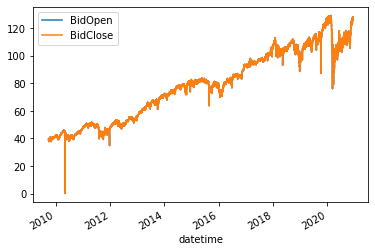

In [8]:
# stock_ts.columns = ['price']
## Replace 0 Values
stock_ts[stock_ts==0] = np.nan
stock_ts = stock_ts.ffill()

## Short time period
# stock_ts = stock_ts.loc['2018':'2019']
stock_ts.plot()

In [9]:
import tensorflow  as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
tf.__version__

'2.3.1'

In [10]:
stock_ts

,BidOpen,BidClose
datetime,,
2009-09-28 09:30:00,39.06,39.06
2009-09-28 09:31:00,39.10,39.09
2009-09-28 09:32:00,39.11,39.15
2009-09-28 09:33:00,39.14,39.14
2009-09-28 09:34:00,39.14,39.12
...,...,...
2020-12-08 15:56:00,127.98,128.01
2020-12-08 15:58:00,128.02,128.06
2020-12-08 15:59:00,128.06,127.96


In [11]:
# train['target'] = train['price'].shift(-1)
# test['target'] = test['price'].shift(-1)

# train

### 11/29/20 Adding technical indicators

In [12]:
stock_ts.index

DatetimeIndex(['2009-09-28 09:30:00', '2009-09-28 09:31:00',
               '2009-09-28 09:32:00', '2009-09-28 09:33:00',
               '2009-09-28 09:34:00', '2009-09-28 09:36:00',
               '2009-09-28 09:37:00', '2009-09-28 09:38:00',
               '2009-09-28 09:40:00', '2009-09-28 09:41:00',
               ...
               '2020-12-08 15:51:00', '2020-12-08 15:52:00',
               '2020-12-08 15:53:00', '2020-12-08 15:54:00',
               '2020-12-08 15:55:00', '2020-12-08 15:56:00',
               '2020-12-08 15:58:00', '2020-12-08 15:59:00',
               '2020-12-08 16:00:00', '2020-12-08 18:07:00'],
              dtype='datetime64[ns]', name='datetime', length=923921, freq=None)

In [13]:
import pandas as pd
def custom_BH_freq():
    return pd.tseries.offsets.CustomBusinessHour(start='09:30',end='16:30')
CBH = custom_BH_freq()
CBH

<CustomBusinessHour: CBH=09:30-16:30>

In [14]:
stocks_B = pd.DataFrame()
stocks_B['BidOpen'] = stock_ts['BidOpen'].resample('B').first()
stocks_B['BidClose'] = stock_ts['BidClose'].resample('B').last()
stocks_B.ffill(inplace=True)
stocks_B

,BidOpen,BidClose
datetime,,
2009-09-28,39.06,39.71
2009-09-29,39.73,39.67
2009-09-30,39.73,39.52
2009-10-01,39.33,38.18
2009-10-02,37.73,38.14
...,...,...
2020-12-02,125.40,126.47
2020-12-03,126.41,126.71
2020-12-04,127.04,128.18


In [15]:
stocks_B.isna().sum()

BidOpen     0
BidClose    0
dtype: int64

In [16]:
stocks_B.index

DatetimeIndex(['2009-09-28', '2009-09-29', '2009-09-30', '2009-10-01',
               '2009-10-02', '2009-10-05', '2009-10-06', '2009-10-07',
               '2009-10-08', '2009-10-09',
               ...
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08'],
              dtype='datetime64[ns]', name='datetime', length=2922, freq='B')

In [17]:
# def get_day_window_size_from_freq(dataset, CBH=custom_BH_freq()):#, freq='CBH'):
    
#     if dataset.index.freq == CBH: #custom_BH_freq():
#         day_window_size =  7
    
#     elif dataset.index.freq=='T':
#         day_window_size = 60*24
#     elif dataset.index.freq=='BH':
#         day_window_size = 8
#     elif dataset.index.freq=='H':
#         day_window_size =24

#     elif dataset.index.freq=='B':
#         day_window_size=1
#     elif dataset.index.freq=='D':
#         day_window_size=1
        
#     else:
#         raise Exception(f'dataset freq={dataset.index.freq}')
        
#     return day_window_size
    

    

In [18]:
import pandas as pd
import numpy as np

def get_technical_indicators(df, make_price_from='BidClose',n_samples_day=1):
    """Calculates technical indicators for stock data"""
    dataset = pd.DataFrame()
    dataset['price'] =df[make_price_from].copy()
    days = n_samples_day
        
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7*days).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21*days).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['price'].ewm(span=26*days).mean()
#     dataset['12ema'] = pd.ewma(dataset['price'], span=12)
    dataset['12ema'] = dataset['price'].ewm(span=12*days).mean()

    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
#     dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
    dataset['20sd'] = dataset['price'].rolling(20*days).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-days*1
    
    return dataset

In [19]:
stocks_df =get_technical_indicators(stocks_B)
stocks_df#

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-09-28,39.71,NaN,NaN,39.710000,39.710000,0.000000,NaN,NaN,NaN,39.710000,38.71
2009-09-29,39.67,NaN,NaN,39.689231,39.688333,-0.000897,NaN,NaN,NaN,39.680000,38.67
2009-09-30,39.52,NaN,NaN,39.628428,39.622633,-0.005795,NaN,NaN,NaN,39.569231,38.52
2009-10-01,38.18,NaN,NaN,39.223511,39.167250,-0.056261,NaN,NaN,NaN,38.631500,37.18
2009-10-02,38.14,NaN,NaN,38.972240,38.888150,-0.084090,NaN,NaN,NaN,38.302479,37.14
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,126.47,125.520000,122.355238,121.459753,124.164361,2.704608,3.217776,128.790790,115.919686,126.006145,125.47
2020-12-03,126.71,125.534286,122.921905,121.848660,124.555998,2.707338,2.719029,128.359963,117.483846,126.475382,125.71
2020-12-04,128.18,125.915714,123.564762,122.317648,125.113537,2.795888,2.355487,128.275737,118.853787,127.611794,127.18


In [20]:
stocks_df.index

DatetimeIndex(['2009-09-28', '2009-09-29', '2009-09-30', '2009-10-01',
               '2009-10-02', '2009-10-05', '2009-10-06', '2009-10-07',
               '2009-10-08', '2009-10-09',
               ...
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08'],
              dtype='datetime64[ns]', name='datetime', length=2922, freq='B')

In [21]:
stocks_df.isna().sum()

price          0
ma7            6
ma21          20
26ema          0
12ema          0
MACD           0
20sd          19
upper_band    20
lower_band    20
ema            0
momentum       0
dtype: int64

<AxesSubplot:>

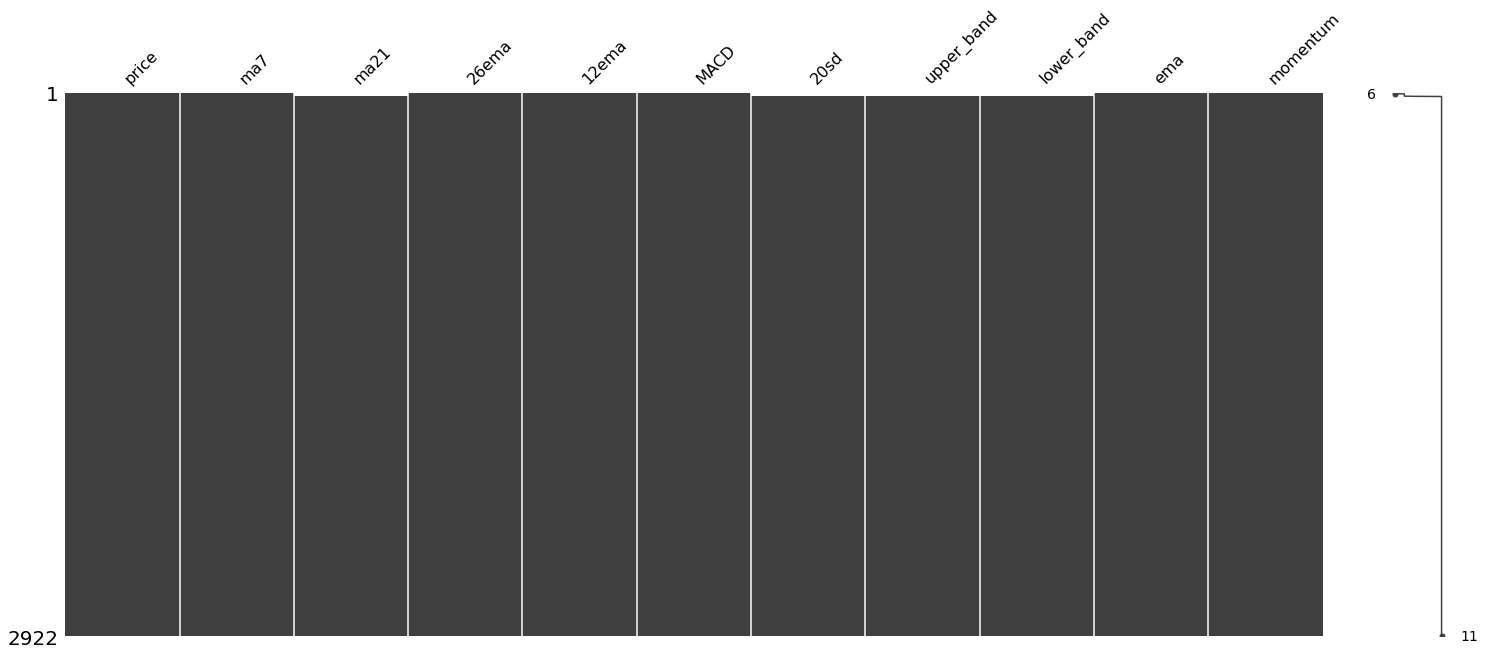

In [22]:
import missingno as ms
ms.matrix(stocks_df)

In [23]:
## REMAKE STOCK_TS
stock_ts = stocks_df.dropna()
stock_ts

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-10-26,39.20,40.122857,39.737619,39.886780,39.958907,0.072126,0.757474,41.252568,38.222670,39.458071,38.20
2009-10-27,39.01,39.921429,39.704286,39.807195,39.809125,0.001930,0.774817,41.253919,38.154652,39.159357,38.01
2009-10-28,38.24,39.574286,39.636190,39.667276,39.562431,-0.104845,0.841024,41.318239,37.954142,38.546452,37.24
2009-10-29,39.18,39.392857,39.620000,39.624424,39.502508,-0.121916,0.776806,41.173612,38.066388,38.968817,38.18
2009-10-30,37.93,39.110000,39.608095,39.477450,39.256811,-0.220639,0.799962,41.208020,38.008171,38.276272,36.93
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,126.47,125.520000,122.355238,121.459753,124.164361,2.704608,3.217776,128.790790,115.919686,126.006145,125.47
2020-12-03,126.71,125.534286,122.921905,121.848660,124.555998,2.707338,2.719029,128.359963,117.483846,126.475382,125.71
2020-12-04,128.18,125.915714,123.564762,122.317648,125.113537,2.795888,2.355487,128.275737,118.853787,127.611794,127.18


In [24]:
plt.rcParams['figure.figsize'] = 12,6

<AxesSubplot:xlabel='datetime'>

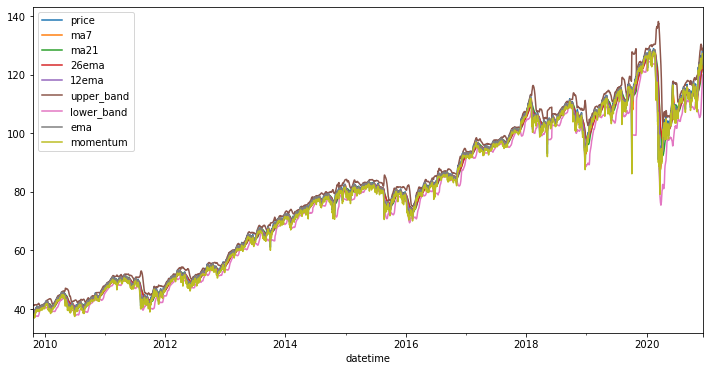

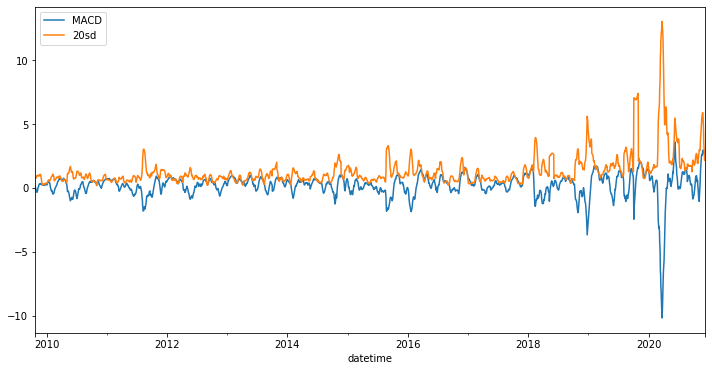

In [25]:
stock_ts.drop(['MACD','20sd'],axis=1).plot()
stock_ts[['MACD','20sd']].plot()

In [26]:
# stock_ts[['upper_band','lower_band']].plot()

### Preparing data [Link](https://www.tensorflow.org/tutorials/structured_data/time_series#split_the_data)

In [27]:
## Train Test Val split
column_indices = {name: i for i, name in enumerate(stock_ts.columns)}

n = len(stock_ts)
train_df = stock_ts[0:int(n*0.7)]
val_df = stock_ts[int(n*0.7):int(n*0.9)]
test_df = stock_ts[int(n*0.9):]

num_features = stock_ts.shape[1]


[print(var.shape[0]) for var in [train_df,val_df,test_df]];

2031
580
291


<AxesSubplot:xlabel='datetime'>

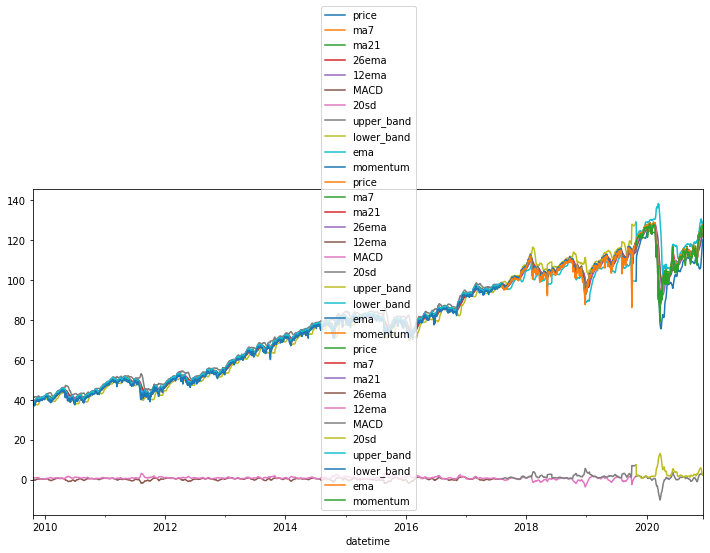

In [28]:
# int_split = round(len(stock_ts)*.8)
# train = stock_ts.iloc[:int_split]
# test = stock_ts.iloc[int_split:]

fig,ax= plt.subplots()

train_df.plot(ax=ax)
val_df.plot(ax=ax)
test_df.plot(ax=ax)

In [29]:
# test.shape

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df)#['price'].values.reshape(-1,1))
X_val = scaler.transform(val_df)
X_test = scaler.transform(test_df)#['price'].values.reshape(-1,1))

X_train

array([[0.02102301, 0.02912297, 0.00469733, ..., 0.01254353, 0.02196117,
        0.02102301],
       [0.01787783, 0.02575435, 0.00412449, ..., 0.01139399, 0.01699405,
        0.01787783],
       [0.0051316 , 0.01994887, 0.00295425, ..., 0.00800527, 0.00680247,
        0.0051316 ],
       ...,
       [0.99619268, 0.99820819, 0.99725034, ..., 0.99602643, 0.99809212,
        0.99619268],
       [0.99917232, 0.99930716, 0.99877247, ..., 0.99774249, 0.99952303,
        0.99917232],
       [0.99917232, 1.        , 1.        , ..., 1.        , 1.        ,
        0.99917232]])

In [31]:
X_train.shape, stock_ts.shape

((2031, 11), (2902, 11))

<AxesSubplot:xlabel='datetime'>

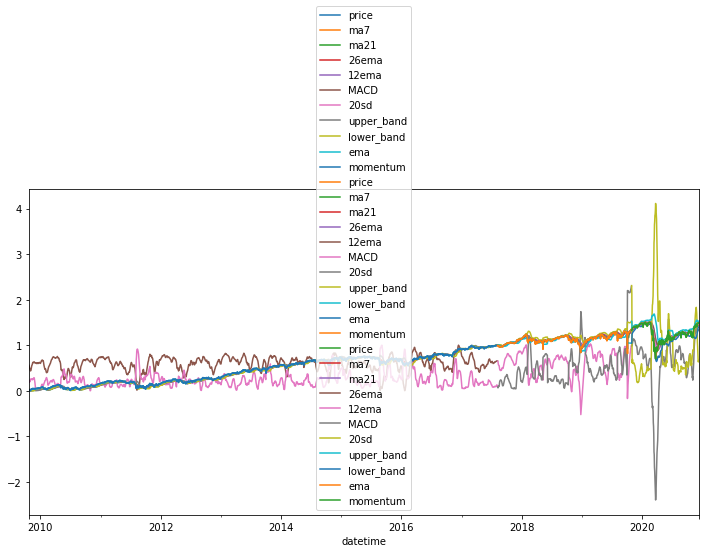

In [32]:
X_train = pd.DataFrame(X_train,index=train_df.index,
                       columns=stock_ts.columns)#['BidOpen','BidClose'])
X_val = pd.DataFrame(X_val,index=val_df.index,
                       columns=stock_ts.columns)
X_test = pd.DataFrame(X_test,index=test_df.index,columns=stock_ts.columns)#['BidOpen','BidClose'])

fig,ax= plt.subplots()
X_train.plot(ax=ax)
X_val.plot(ax=ax)
X_test.plot(ax=ax)

In [33]:
# X_test.describe()
X_train.head()

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-10-26,0.021023,0.029123,0.004697,0.012735,0.019238,0.556807,0.185804,0.003767,0.012544,0.021961,0.021023
2009-10-27,0.017878,0.025754,0.004124,0.011374,0.016707,0.536577,0.191352,0.003791,0.011394,0.016994,0.017878
2009-10-28,0.005132,0.019949,0.002954,0.008980,0.012539,0.505805,0.212533,0.004907,0.008005,0.006802,0.005132
2009-10-29,0.020692,0.016915,0.002676,0.008247,0.011526,0.500885,0.191988,0.002397,0.009902,0.013826,0.020692
2009-10-30,0.000000,0.012184,0.002471,0.005733,0.007375,0.472434,0.199397,0.002994,0.008918,0.002310,0.000000


In [34]:
## Set the number of features in input sequences
n_features = X_train.shape[1]
n_features

11

In [35]:
## Save values as seris
series = X_train.values
print(series.shape)

series = series.reshape((len(series), n_features))
series.shape

(2031, 11)


(2031, 11)

In [36]:
column_indices

{'price': 0,
 'ma7': 1,
 'ma21': 2,
 '26ema': 3,
 '12ema': 4,
 'MACD': 5,
 '20sd': 6,
 'upper_band': 7,
 'lower_band': 8,
 'ema': 9,
 'momentum': 10}

In [37]:
series

array([[0.02102301, 0.02912297, 0.00469733, ..., 0.01254353, 0.02196117,
        0.02102301],
       [0.01787783, 0.02575435, 0.00412449, ..., 0.01139399, 0.01699405,
        0.01787783],
       [0.0051316 , 0.01994887, 0.00295425, ..., 0.00800527, 0.00680247,
        0.0051316 ],
       ...,
       [0.99619268, 0.99820819, 0.99725034, ..., 0.99602643, 0.99809212,
        0.99619268],
       [0.99917232, 0.99930716, 0.99877247, ..., 0.99774249, 0.99952303,
        0.99917232],
       [0.99917232, 1.        , 1.        , ..., 1.        , 1.        ,
        0.99917232]])

In [38]:
## Specifying the number of timesteps for the sequences
length=5
price_col = column_indices['price']

## Making the time series generator
train_gen = TimeseriesGenerator(series,series[:,price_col],
                                     length,batch_size=64)
train_gen

In [39]:
## Testing out an individual outpuyt from timeseries_gen
ex_X,ex_y =train_gen[1]
ex_X[1], ex_y[1]

(array([[0.04883297, 0.05736197, 0.04207959, 0.04375355, 0.05002997,
         0.55946273, 0.15502284, 0.03817848, 0.05255823, 0.04669071,
         0.04883297],
        [0.04502566, 0.053635  , 0.04136763, 0.0424214 , 0.04708917,
         0.53174542, 0.1718121 , 0.03928107, 0.05008419, 0.04341755,
         0.04502566],
        [0.04899851, 0.0504814 , 0.04091753, 0.04149263, 0.04522467,
         0.51559032, 0.18108688, 0.03983282, 0.04866162, 0.04498703,
         0.04899851],
        [0.04370137, 0.04534486, 0.0401892 , 0.04022688, 0.04281519,
         0.4958167 , 0.19267525, 0.04035461, 0.04672099, 0.04196281,
         0.04370137],
        [0.03724549, 0.03994553, 0.03945269, 0.03856039, 0.0397626 ,
         0.47182509, 0.21477746, 0.04200885, 0.04366146, 0.03663137,
         0.03724549]]),
 0.04800529713623569)

In [40]:
## Making val data
val_series = X_val.values
val_series = val_series.reshape((len(val_series),n_features))
val_gen = TimeseriesGenerator(val_series,val_series[:,price_col],length,batch_size=64)

## Making test data
test_series = X_test.values
test_series = test_series.reshape((len(test_series),n_features))
test_gen = TimeseriesGenerator(test_series,test_series[:,price_col],length,batch_size=64)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

input_shape=(length,n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50,  activation='relu',
                input_shape =input_shape,return_sequences=False))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', metrics=['mse'],
              optimizer=optimizers.Adam())

display(model1.summary())
history = model1.fit(train_gen,epochs=10,validation_data=val_gen)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                12400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
32/32 [==============================] - 0s 9ms/step - loss: 0.2889 - mse: 0.2889 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 6.6310e-04 - mse: 6.6310e-04 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 5.8896e-04 - mse: 5.8896e-04 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 5.1472e-04 - mse: 5.1472e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 4.5111e-04 - mse: 4.5111e-04 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 8/10
32/32 [==============================] - 0s 4ms

<Figure size 864x432 with 0 Axes>

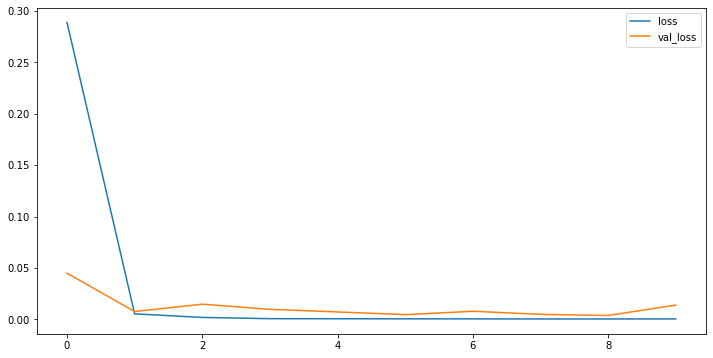

<Figure size 864x432 with 0 Axes>

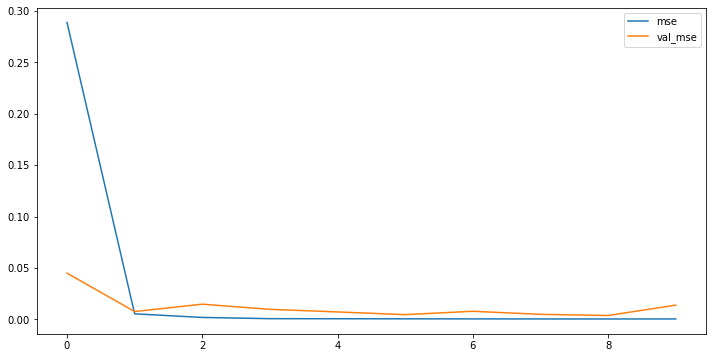

In [42]:
results= pd.DataFrame(history.history)
results

metrics = ['loss','mse']
for metric in metrics:
    plt.figure()
    plot_cols = [col for col in results.columns if metric in col]
    results[plot_cols].plot()

In [43]:
y_hat_test = model1.predict(test_gen)
y_hat_test.shape

(286, 1)

In [44]:
y_pred = pd.Series(y_hat_test.flatten(),index =X_test.iloc[length:].index)
y_pred

datetime
2019-11-05    1.490399
2019-11-06    1.561781
2019-11-07    1.585234
2019-11-08    1.598304
2019-11-11    1.609193
                ...   
2020-12-02    1.653138
2020-12-03    1.674076
2020-12-04    1.697611
2020-12-07    1.725353
2020-12-08    1.739607
Freq: B, Length: 286, dtype: float32

In [45]:
## Slice out thefirst window length
X_test.iloc[length:].shape

(286, 11)

In [46]:
X_test

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-10-29,1.325774,1.335213,1.282773,1.308932,1.324454,0.982706,2.309124,1.524823,1.045089,1.334096,1.325774
2019-10-30,1.346300,1.339800,1.286897,1.313498,1.329793,0.996832,2.135177,1.510116,1.067523,1.343989,1.346300
2019-10-31,1.340672,1.343001,1.301129,1.317295,1.333426,0.994832,0.614253,1.359472,1.242213,1.343517,1.340672
2019-11-01,1.367820,1.348305,1.328445,1.322890,1.340764,1.025739,0.650593,1.391001,1.265237,1.361540,1.367820
2019-11-04,1.381725,1.356022,1.334165,1.329134,1.349156,1.063685,0.684891,1.400498,1.267239,1.376860,1.381725
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,1.465651,1.457271,1.424511,1.408210,1.442021,1.315474,0.972892,1.522983,1.325658,1.461112,1.465651
2020-12-03,1.469624,1.457510,1.434250,1.414864,1.448639,1.316260,0.813335,1.515506,1.352093,1.468915,1.469624
2020-12-04,1.493958,1.463889,1.445297,1.422887,1.458059,1.341780,0.697033,1.514044,1.375246,1.487811,1.493958


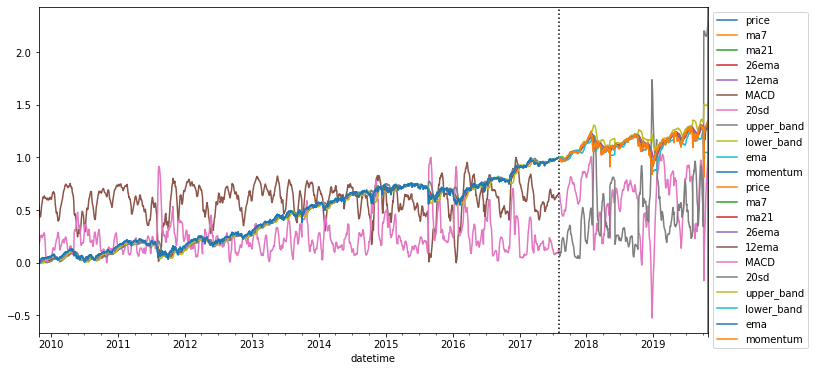

In [47]:
fig,ax = plt.subplots()
X_train.plot(ax=ax)
ax.axvline(X_train.index[-1],color='k',ls=':')
X_val.plot(ax=ax,label='Val')
ax.axvline(X_val.index[-1])
ax.legend(bbox_to_anchor=[1,1])

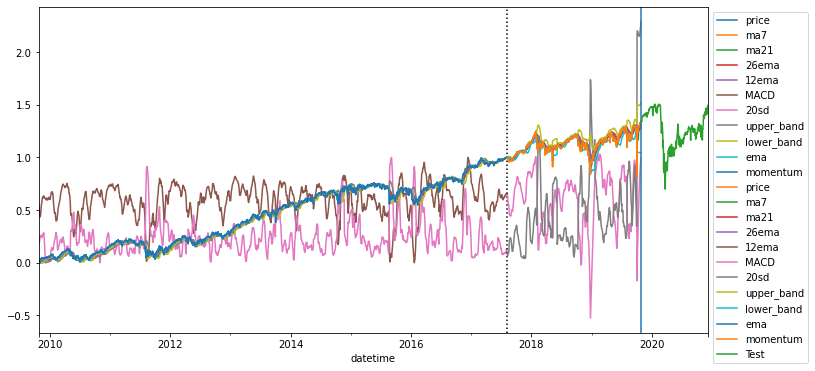

In [48]:
X_test['price'].plot(ax=ax,label='Test')
ax.legend(bbox_to_anchor=[1,1])
fig


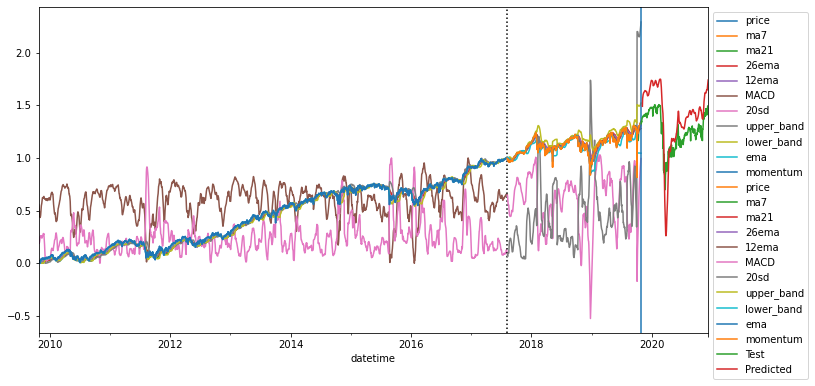

In [49]:
# ax.plot(X_test[length:].index,y_hat_test.flatten(),label='Predicted')
y_pred.plot(ax=ax,label='Predicted')
ax.legend(bbox_to_anchor=[1,1])
fig

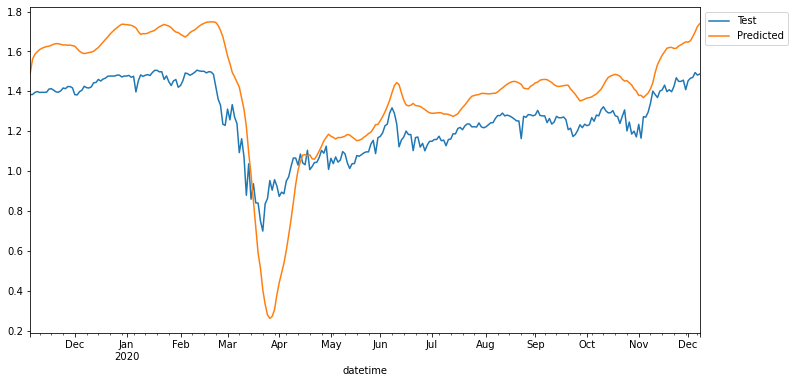

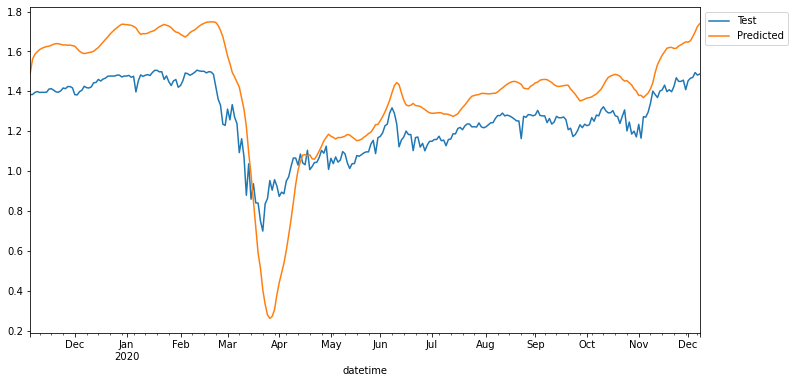

In [50]:
fig,ax = plt.subplots()
X_test.iloc[length:]['price'].plot(ax=ax,label='Test')
y_pred.plot(ax=ax,label='Predicted')
ax.legend(bbox_to_anchor=[1,1])
fig

# Multi In Multi Out

<AxesSubplot:xlabel='datetime'>

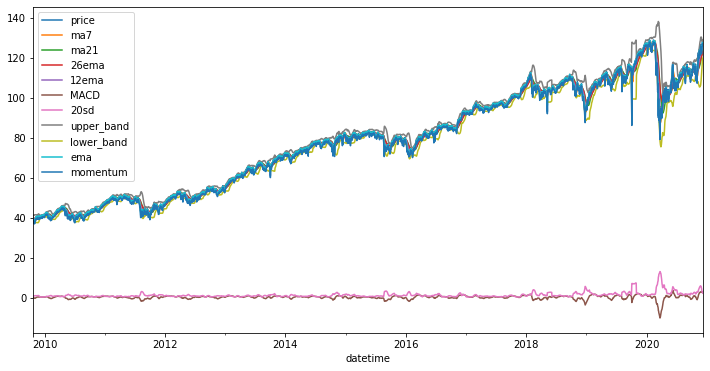

In [51]:
stock_ts.plot()

In [52]:
num_features = stock_ts.shape[1]

column_indices = {name: i for i, name in enumerate(stock_ts.columns)}

n = len(stock_ts)
train_df = stock_ts[0:int(n*0.7)]
val_df = stock_ts[int(n*0.7):int(n*0.9)]
test_df = stock_ts[int(n*0.9):]



[print(var.shape[0]) for var in [train_df,val_df,test_df]];

2031
580
291


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(train_df),
                       index=train_df.index, columns=stock_ts.columns)
                       
X_val = pd.DataFrame(scaler.transform(val_df),
                         index=val_df.index, columns=stock_ts.columns)

X_test = pd.DataFrame(scaler.transform(test_df),
                          index=test_df.index, columns=stock_ts.columns)

X_train

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2009-10-26,0.021023,0.029123,0.004697,0.012735,0.019238,0.556807,0.185804,0.003767,0.012544,0.021961,0.021023
2009-10-27,0.017878,0.025754,0.004124,0.011374,0.016707,0.536577,0.191352,0.003791,0.011394,0.016994,0.017878
2009-10-28,0.005132,0.019949,0.002954,0.008980,0.012539,0.505805,0.212533,0.004907,0.008005,0.006802,0.005132
2009-10-29,0.020692,0.016915,0.002676,0.008247,0.011526,0.500885,0.191988,0.002397,0.009902,0.013826,0.020692
2009-10-30,0.000000,0.012184,0.002471,0.005733,0.007375,0.472434,0.199397,0.002994,0.008918,0.002310,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,1.000000,0.995962,0.995925,0.996010,0.996089,0.653612,0.117394,0.997350,0.994565,0.999212,1.000000
2017-08-02,0.999007,0.997969,0.996596,0.997170,0.997408,0.656570,0.127801,0.999156,0.994126,0.999786,0.999007
2017-08-03,0.996193,0.998208,0.997250,0.998029,0.998083,0.653605,0.115904,0.998527,0.996026,0.998092,0.996193


In [54]:
## Specifying the number of timesteps for the sequences
length=5

## Save values as seris
train_series = X_train.values
train_series = series.reshape((len(series), n_features))
train_series.shape

(2031, 11)

In [55]:
## Specifying the number of timesteps for the sequences
length=5
# price_col = column_indices['price']

## Save values as seris
train_series = X_train.values
train_series = series.reshape((len(series), n_features))
train_series.shape

(2031, 11)

In [56]:
## Making the time series generator
train_gen = TimeseriesGenerator(series,series,#[:,price_col],
                                     length,batch_size=64)

## Making val data
val_series = X_val.values
val_series = val_series.reshape((len(val_series),n_features))
val_gen = TimeseriesGenerator(val_series,val_series,#[:,price_col],
                              length,batch_size=64)

## Making test data
test_series = X_test.values
test_series = test_series.reshape((len(test_series),n_features))
test_gen = TimeseriesGenerator(test_series,test_series,#[:,price_col],
                               length,batch_size=64)

In [57]:
# ## Testing out an individual outpuyt from timeseries_gen
ex_X,ex_y =train_gen[1]
ex_X[1].shape, ex_y[1].shape

((5, 11), (11,))

In [58]:
test_gen.targets.shape

(291, 11)

In [59]:
train_gen.length, train_gen.targets.shape

(5, (2031, 11))

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2


length = train_gen.length
n_features = train_gen.targets.shape[1]

input_shape=(length,n_features)#(length,n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50,  activation='relu',
                input_shape =input_shape,return_sequences=False))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(test_gen.targets.shape[1]))

model1.compile(loss='mse', metrics=['mse'],
              optimizer=optimizers.Adam())

display(model1.summary())
history = model1.fit(train_gen,epochs=10,validation_data=val_gen)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                12400     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                561       
Total params: 12,961
Trainable params: 12,961
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
32/32 [==============================] - 0s 9ms/step - loss: 0.1216 - mse: 0.1216 - val_loss: 0.2649 - val_mse: 0.2649
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0583 - val_mse: 0.0583
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.00

<Figure size 864x432 with 0 Axes>

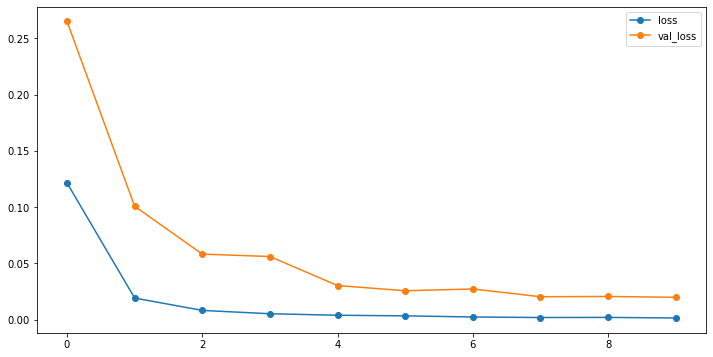

<Figure size 864x432 with 0 Axes>

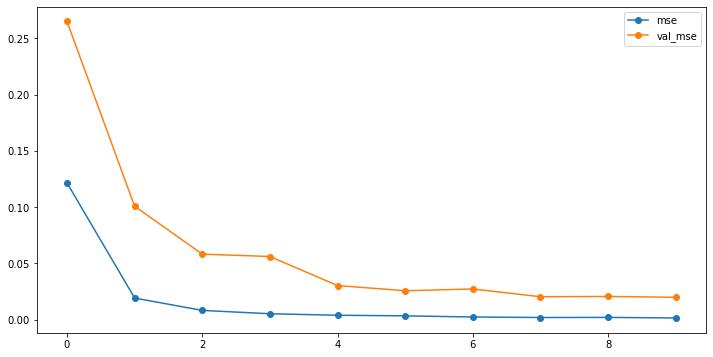

In [61]:
results= pd.DataFrame(history.history)
results

metrics = ['loss','mse']
for metric in metrics:
    plt.figure()
    plot_cols = [col for col in results.columns if metric in col]
    results[plot_cols].plot(marker='o')

In [62]:
y_hat_test = model1.predict(test_gen)
y_hat_test.shape

(286, 11)

In [63]:
y_pred = pd.DataFrame(y_hat_test, index =X_test.iloc[length:].index,
                      columns=X_test.columns)
y_pred

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-11-05,1.482949,1.623756,1.435687,1.945203,1.461292,0.632782,1.749275,1.548831,1.163829,1.600215,1.814680
2019-11-06,1.553849,1.673163,1.544627,1.786915,1.570053,0.831140,1.046713,1.557613,1.358856,1.522127,1.763916
2019-11-07,1.580419,1.701657,1.579860,1.667829,1.644130,0.940674,0.618467,1.568328,1.509274,1.480894,1.687115
2019-11-08,1.597408,1.719785,1.593804,1.679732,1.656405,0.967418,0.611585,1.579797,1.525996,1.495906,1.704755
2019-11-11,1.613693,1.735167,1.610186,1.685124,1.669621,0.995879,0.600383,1.593968,1.543790,1.506487,1.715926
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,1.645773,1.789370,1.625412,2.082573,1.602336,1.320215,2.216022,1.700410,1.322702,1.698896,1.993155
2020-12-03,1.681126,1.817195,1.662248,2.041344,1.648496,1.263305,1.883147,1.717963,1.386859,1.693660,1.990155
2020-12-04,1.711811,1.847806,1.692383,1.988295,1.698375,1.230367,1.512719,1.724959,1.466684,1.680579,1.977795


In [64]:
X_test

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-10-29,1.325774,1.335213,1.282773,1.308932,1.324454,0.982706,2.309124,1.524823,1.045089,1.334096,1.325774
2019-10-30,1.346300,1.339800,1.286897,1.313498,1.329793,0.996832,2.135177,1.510116,1.067523,1.343989,1.346300
2019-10-31,1.340672,1.343001,1.301129,1.317295,1.333426,0.994832,0.614253,1.359472,1.242213,1.343517,1.340672
2019-11-01,1.367820,1.348305,1.328445,1.322890,1.340764,1.025739,0.650593,1.391001,1.265237,1.361540,1.367820
2019-11-04,1.381725,1.356022,1.334165,1.329134,1.349156,1.063685,0.684891,1.400498,1.267239,1.376860,1.381725
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,1.465651,1.457271,1.424511,1.408210,1.442021,1.315474,0.972892,1.522983,1.325658,1.461112,1.465651
2020-12-03,1.469624,1.457510,1.434250,1.414864,1.448639,1.316260,0.813335,1.515506,1.352093,1.468915,1.469624
2020-12-04,1.493958,1.463889,1.445297,1.422887,1.458059,1.341780,0.697033,1.514044,1.375246,1.487811,1.493958


In [65]:
test_gen.targets.shape,X_test.shape

((291, 11), (291, 11))

In [66]:
y_test = pd.DataFrame(test_gen.targets, index =X_test.index,
                      columns=X_test.columns)
y_test

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-10-29,1.325774,1.335213,1.282773,1.308932,1.324454,0.982706,2.309124,1.524823,1.045089,1.334096,1.325774
2019-10-30,1.346300,1.339800,1.286897,1.313498,1.329793,0.996832,2.135177,1.510116,1.067523,1.343989,1.346300
2019-10-31,1.340672,1.343001,1.301129,1.317295,1.333426,0.994832,0.614253,1.359472,1.242213,1.343517,1.340672
2019-11-01,1.367820,1.348305,1.328445,1.322890,1.340764,1.025739,0.650593,1.391001,1.265237,1.361540,1.367820
2019-11-04,1.381725,1.356022,1.334165,1.329134,1.349156,1.063685,0.684891,1.400498,1.267239,1.376860,1.381725
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,1.465651,1.457271,1.424511,1.408210,1.442021,1.315474,0.972892,1.522983,1.325658,1.461112,1.465651
2020-12-03,1.469624,1.457510,1.434250,1.414864,1.448639,1.316260,0.813335,1.515506,1.352093,1.468915,1.469624
2020-12-04,1.493958,1.463889,1.445297,1.422887,1.458059,1.341780,0.697033,1.514044,1.375246,1.487811,1.493958


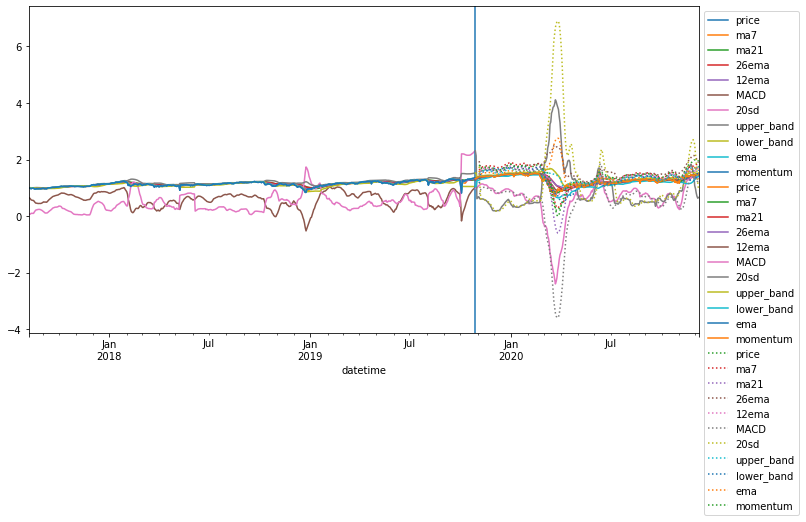

In [67]:
fig,ax = plt.subplots()
# X_train.plot(ax=ax)
# ax.axvline(X_train.index[-1],color='k',ls=':')

X_val.plot(ax=ax,label='Val')
ax.axvline(X_test.index[0])

y_test.plot(ax=ax,ls='-')
y_pred.plot(ax=ax,ls=':')

ax.legend(bbox_to_anchor=[1,1])


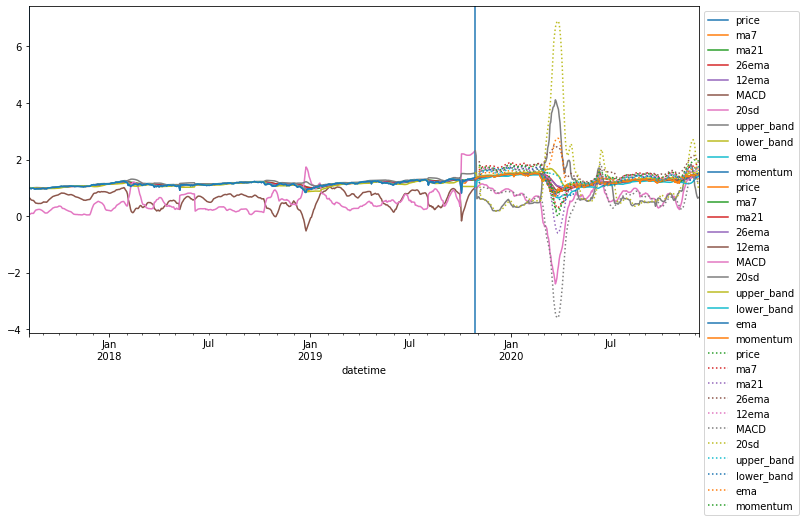

In [68]:
fig,ax = plt.subplots()
# X_train.plot(ax=ax)
# ax.axvline(X_train.index[-1],color='k',ls=':')

X_val.plot(ax=ax,label='Val')

ax.axvline(X_val.index[0])
ax.axvline(X_test.index[0])

y_test.plot(ax=ax,ls='-')
y_pred.plot(ax=ax,ls=':')

ax.legend(bbox_to_anchor=[1,1])

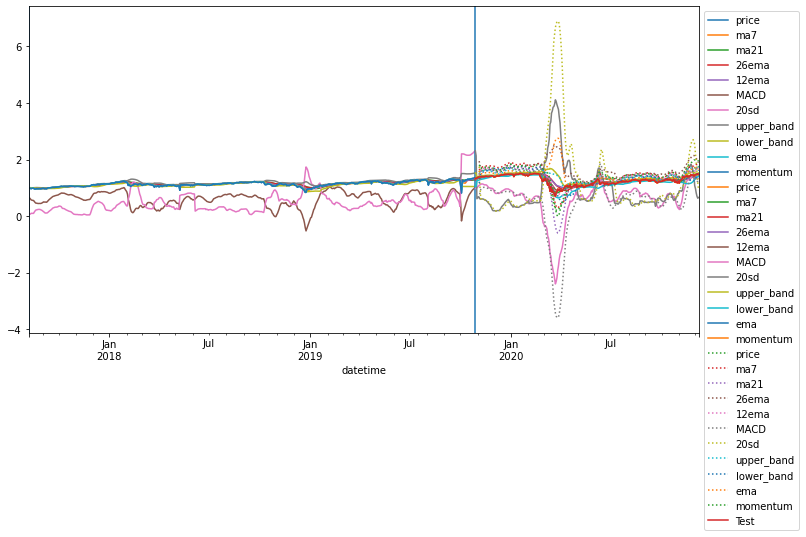

In [70]:
X_test['price'].plot(ax=ax,label='Test')
ax.legend(bbox_to_anchor=[1,1])
fig

In [71]:
y_hat_test = model1.predict(test_gen)
y_hat_test.shape

(286, 11)

In [72]:
y_hat_test[0]

array([1.4829485, 1.6237556, 1.4356872, 1.9452034, 1.4612919, 0.632782 ,
       1.7492751, 1.5488305, 1.1638291, 1.6002147, 1.8146795],
      dtype=float32)

In [73]:
X_test.shape[0]

291

In [74]:
y_pred = pd.DataFrame(y_hat_test,
                      index =X_test.iloc[-y_hat_test.shape[0]:].index,
                     columns=X_test.columns)
y_pred

,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
datetime,,,,,,,,,,,
2019-11-05,1.482949,1.623756,1.435687,1.945203,1.461292,0.632782,1.749275,1.548831,1.163829,1.600215,1.814680
2019-11-06,1.553849,1.673163,1.544627,1.786915,1.570053,0.831140,1.046713,1.557613,1.358856,1.522127,1.763916
2019-11-07,1.580419,1.701657,1.579860,1.667829,1.644130,0.940674,0.618467,1.568328,1.509274,1.480894,1.687115
2019-11-08,1.597408,1.719785,1.593804,1.679732,1.656405,0.967418,0.611585,1.579797,1.525996,1.495906,1.704755
2019-11-11,1.613693,1.735167,1.610186,1.685124,1.669621,0.995879,0.600383,1.593968,1.543790,1.506487,1.715926
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,1.645773,1.789370,1.625412,2.082573,1.602336,1.320215,2.216022,1.700410,1.322702,1.698896,1.993155
2020-12-03,1.681126,1.817195,1.662248,2.041344,1.648496,1.263305,1.883147,1.717963,1.386859,1.693660,1.990155
2020-12-04,1.711811,1.847806,1.692383,1.988295,1.698375,1.230367,1.512719,1.724959,1.466684,1.680579,1.977795
